# Insurance Claims- Fraud Detection

# Importing necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,r2_score,roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')




# Importing dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
pd.set_option("display.max_columns", None)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


The dataset contain both categorical and numerical column. Here Fraud_reporter is our target column, since it has two categorical so it termed to be classfication problem. We need to predict the insurance claim is fraudulent or not

# Exploratory Data Analysis(EDA)

This dataset contain 1000 rows and 40 columns

In [4]:
#to get good overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

This gives the info about the datatype index type, colunntype, non null values and memory usage
Here _c39 have 0 non null values which means it has one unique values throughout the data we can drop this column

In [5]:
#checking the dimension of dataset
df.shape

(1000, 40)

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df.drop("_c39", axis=1, inplace=True)

non of the columns in dataset contain any null values

<AxesSubplot:>

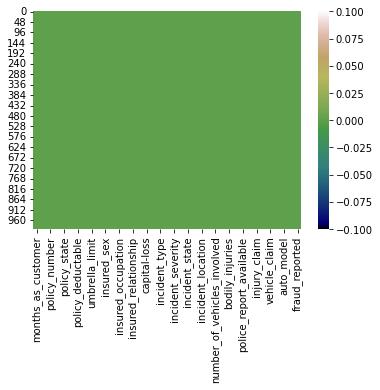

In [8]:
#lets visualize the null values
sns.heatmap(df.isnull(), cmap="gist_earth")

Here we can clearly see that the dataset contain 0 null values

In [9]:
#chekcing the type of dataset
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The dataset contain three different types of data, int object and float type

In [10]:
#checking the unique values of each column
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

these are the unique values present in the dataset

In [11]:
#checking the number of columns in dataset
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

These are the columns present in the dataset

# Data Preprocessing

We can observe the columns policy_number and incident_location have 1000 unique numbers which means they have only one value count. So it is not required for the prediction so we can drop it

In [12]:
#cheking the value count of each column
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('===================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

By looking the value counts of each cloumns we can observe that the columns unbrella_limit, capital_gain, capital_loss contain zero values. 
since the umbrella_limit has more zero values we can drop it

In [13]:
#replacing'?' with No info
df=df.replace('?','No Info')

In [14]:
#cheking the value count of each column
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('===================================================')

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
reading           64

In [15]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [16]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

We can see there is one row in negative value mustbe the mistakeor not sure dropping the row

In [17]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,29-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,3936 Tree Drive,13,1,YES,0,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


1 rows x 39 columns

In [18]:
#droping the value row(one row only)
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

In [19]:
#dividing incident_date into three columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [20]:
# in incident data all the incident is from 2015 so droppping the incident year

df['incident_Year'].value_counts()
df.drop('incident_Year', axis=1, inplace=True)

In [21]:
#dividing incident_date into three columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

In [22]:
#droping policy_bind_date column
df.drop('policy_bind_date', axis=1, inplace=True)

In [23]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Info,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,No Info,0,0,No Info,5070,780,780,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,No Info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Info,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [24]:
#dropping the policy_number and other useless columns as well
df.drop(['policy_number','insured_zip','incident_location'], axis=1, inplace=True)

In [25]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Info,Minor Damage,Police,VA,Riverwood,8,1,No Info,0,0,No Info,5070,780,780,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,No Info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Info,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,02,06,06,2014


5 rows and 40 columns

In [26]:
df.shape

(999, 40)

In [27]:
df["fraud_reported"].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

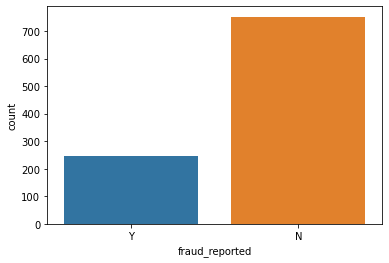

In [28]:
sns.countplot(df["fraud_reported"])

We can notice data is imbalacne we have to deal with this

# EDA

In [29]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,No Info,Minor Damage,Police,VA,Riverwood,8,1,No Info,0,0,No Info,5070,780,780,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,No Info,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,No Info,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,02,06,06,2014


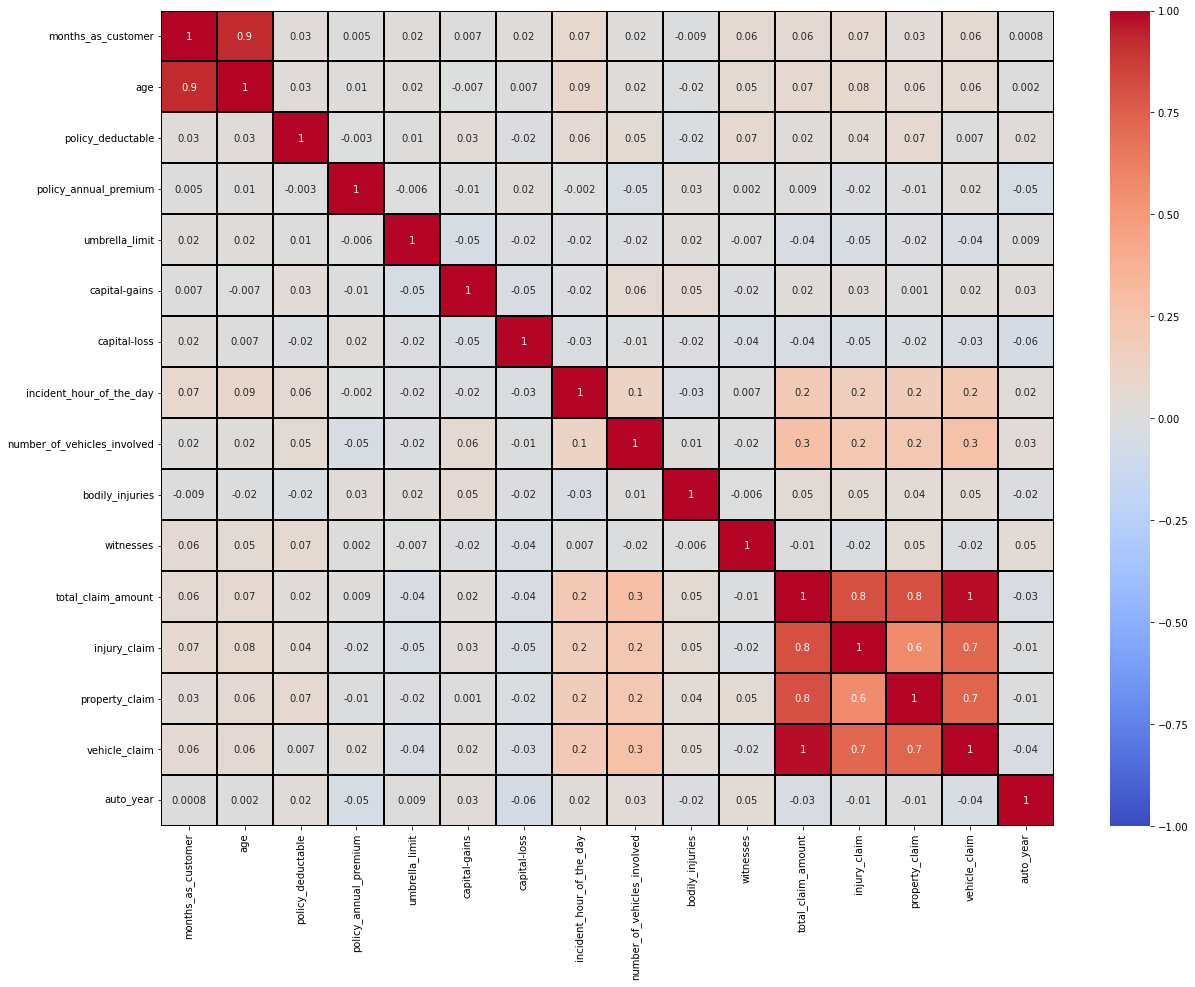

In [30]:
#Visualizing the correlation using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=.1,vmin=-1,vmax=1,fmt='.1g',annot=True,linecolor="black", annot_kws={'size':10}, cmap="coolwarm")
plt.yticks(rotation=0);

We can notice total_claim-am ount, injury_claim, property_claim and vehicle_claim are highly correlated with each other

All others are very less corelated with each other

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

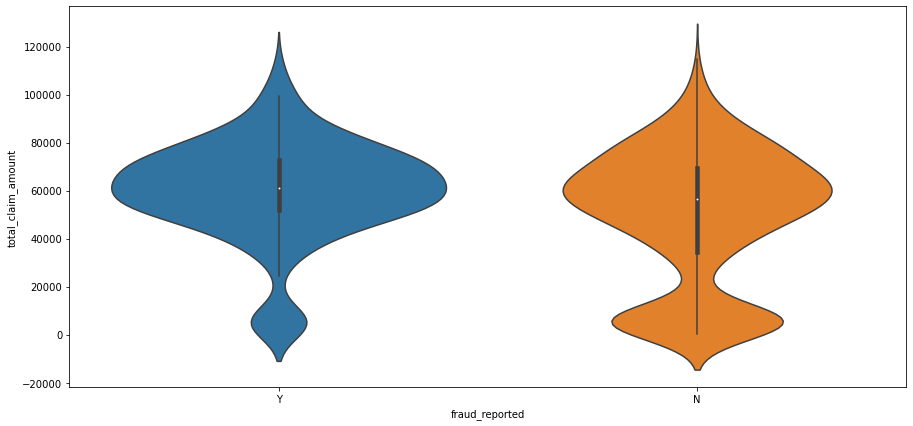

In [31]:
plt.figure(figsize=(15,7))
sns.violinplot(y='total_claim_amount', x='fraud_reported', data=df)

most of fraud reported found where total claimed amount 50000 to 70000

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

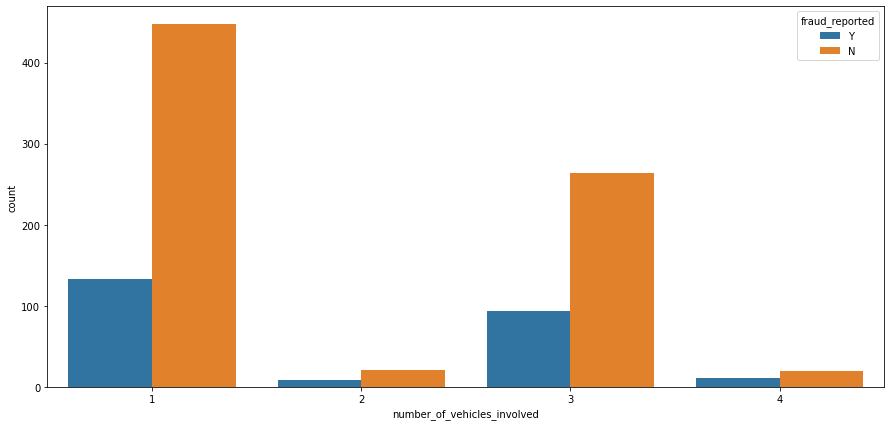

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x='number_of_vehicles_involved', hue='fraud_reported', data=df)

most of the fraud report were found where number of vehicles involved morethan 1

<AxesSubplot:xlabel='incident_city', ylabel='count'>

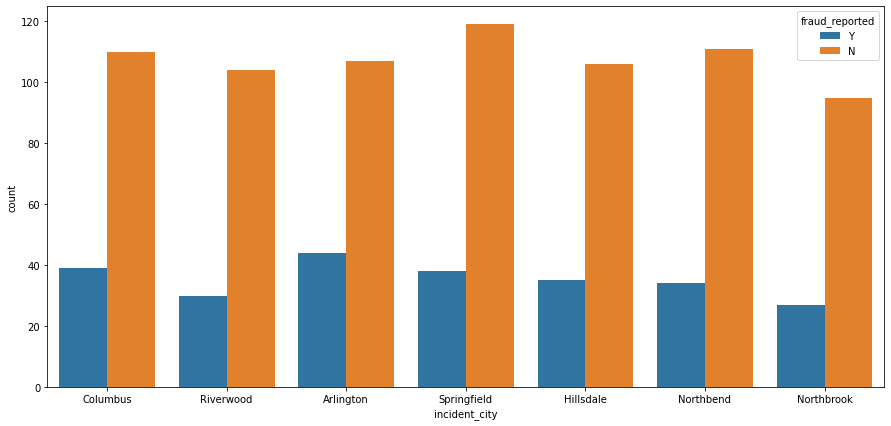

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_city', hue='fraud_reported', data=df)

In all the cities fraud reported count are almost the same

<AxesSubplot:xlabel='incident_state', ylabel='count'>

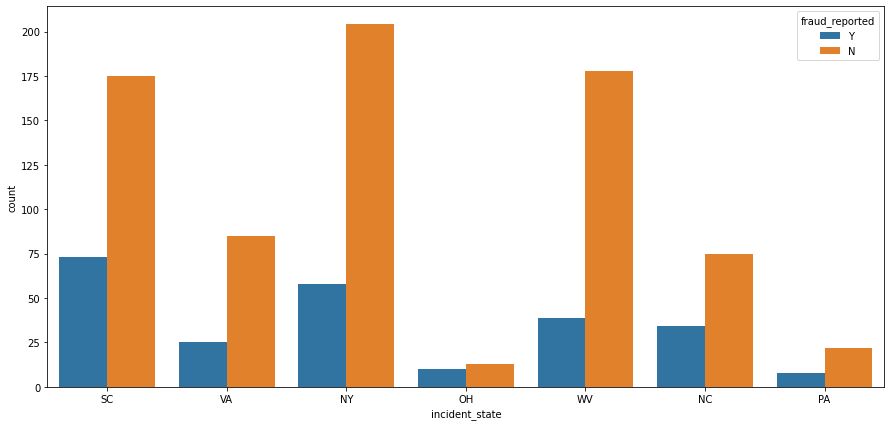

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_state', hue='fraud_reported', data=df)

most of the fraud reported were found where incident state was SC, NY, OH, NC, and PA

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

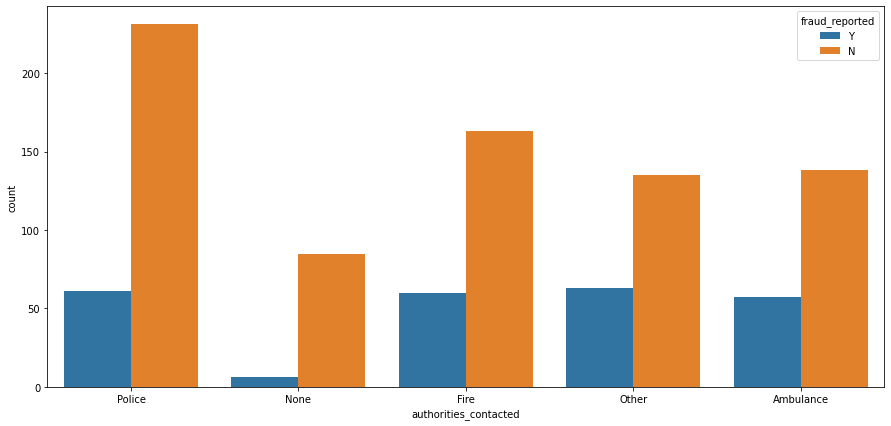

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x='authorities_contacted', hue='fraud_reported', data=df)

most of the fraud founded where cx have contacted authorities_contacted of Fire Other and Ambulance

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

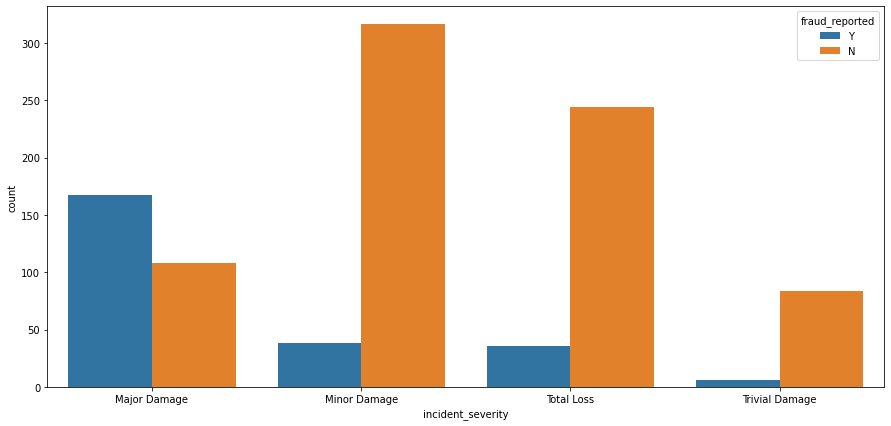

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_severity', hue='fraud_reported', data=df)

Most of the fraud reported claim are Major Damage most of them are counted as Fraud

There are very fraud report on Trivial Damage

<AxesSubplot:xlabel='collision_type', ylabel='count'>

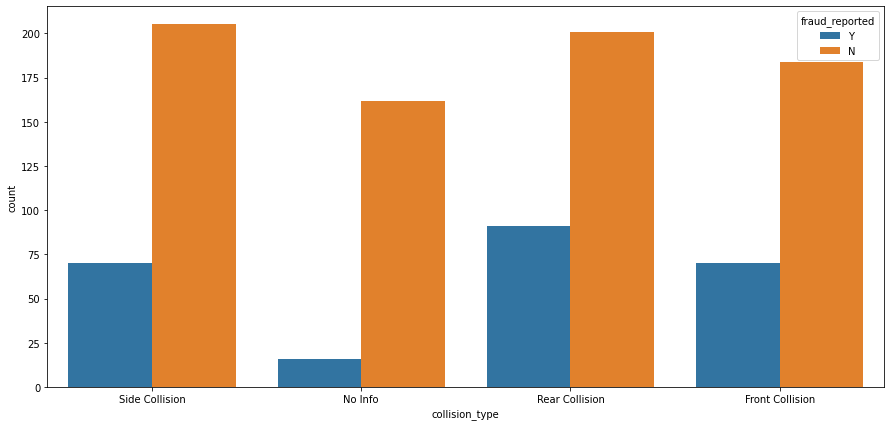

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(x='collision_type', hue='fraud_reported', data=df)

Most of the fraud reported claims in side collison, Rear collision and front Collision

<AxesSubplot:xlabel='incident_type', ylabel='count'>

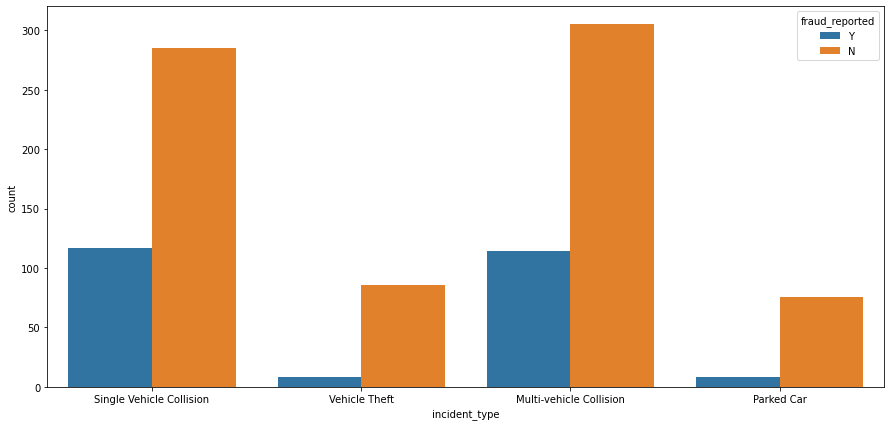

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_type', hue='fraud_reported', data=df)

we have most claim reported  and fraud reported in single vehicle collision and multi vehicle collision incident type



<AxesSubplot:xlabel='incident_Month', ylabel='count'>

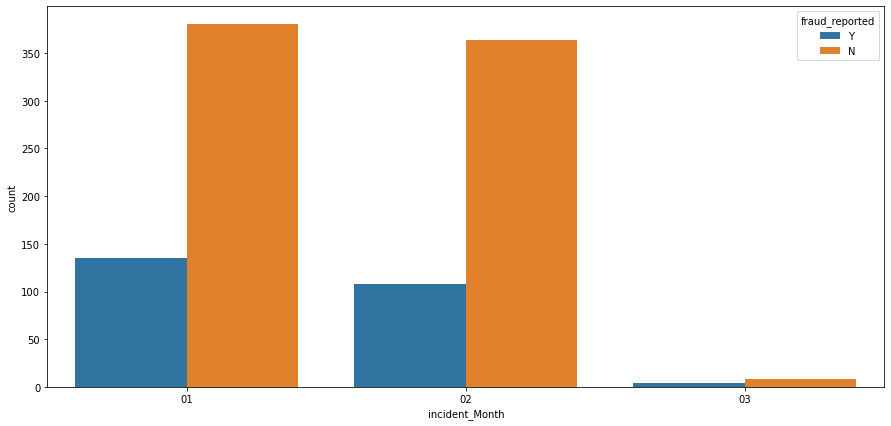

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_Month', hue='fraud_reported', data=df)

Most of the data we have reported in month 1 and 2 fraud reported are also same in both months

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

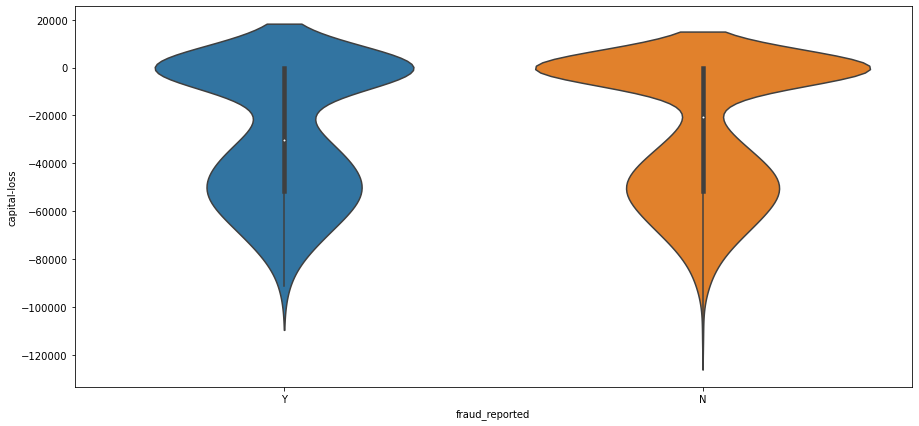

In [41]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-loss', x='fraud_reported', data=df)

Most of the Fraud reported we see in cx those capital loss are  and -40000 to -60000

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

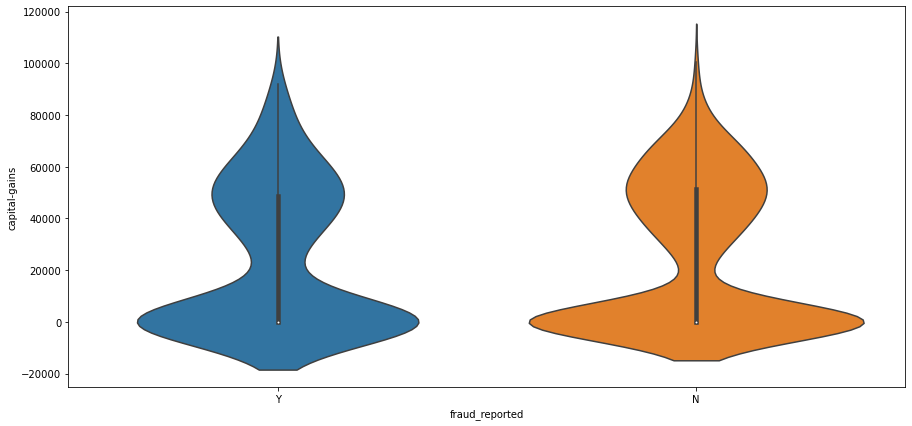

In [42]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-gains', x='fraud_reported', data=df)

most of the fraud reported are in cx those capitalgains are 0 are around 50000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

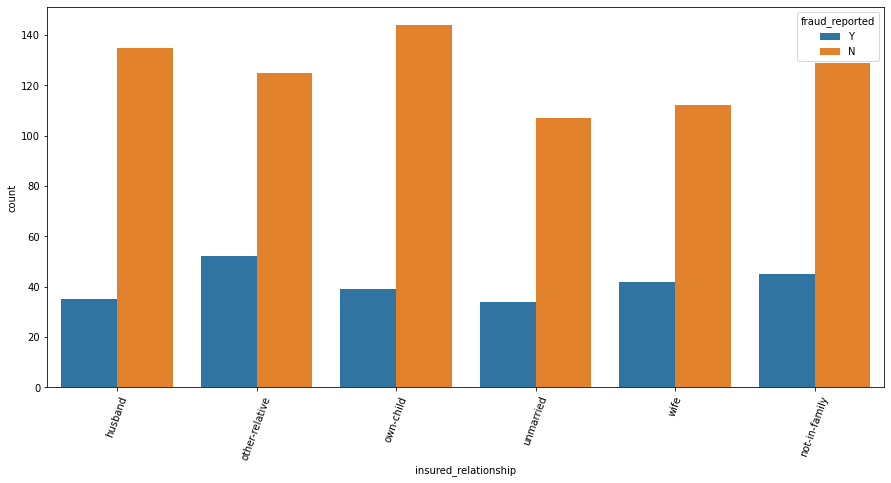

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_relationship', hue='fraud_reported', data=df)
plt.xticks(rotation=70)

according the data info, cx those having insured relationship with other relative and wife are most reported than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

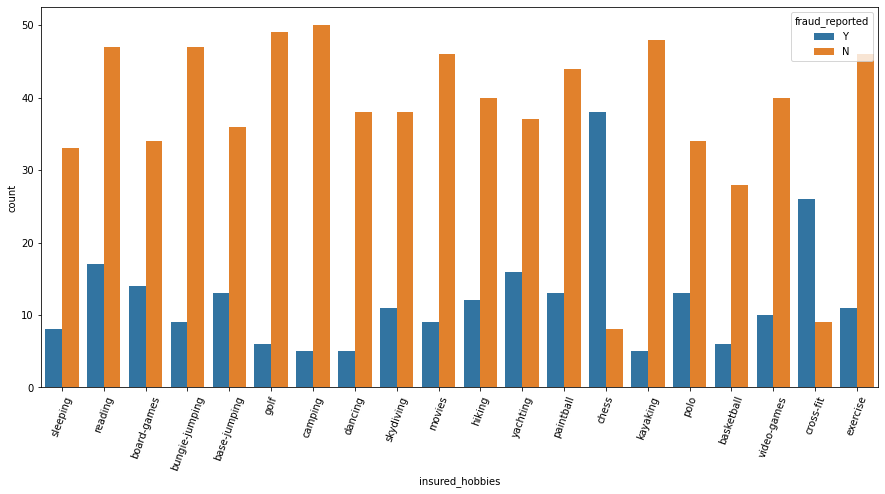

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_hobbies', hue='fraud_reported', data=df)
plt.xticks(rotation=70)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

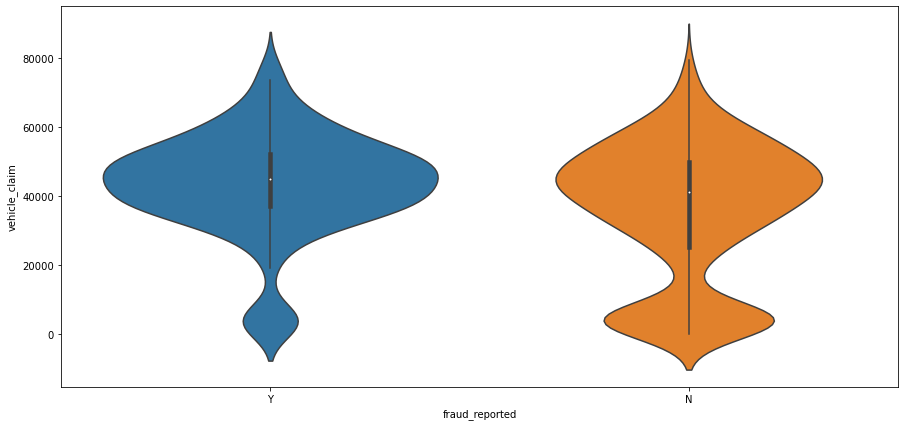

In [45]:
plt.figure(figsize=(15,7))
sns.violinplot(y='vehicle_claim', x='fraud_reported', data=df)

in vehicle claim most of the cx are between 100 to 6500

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

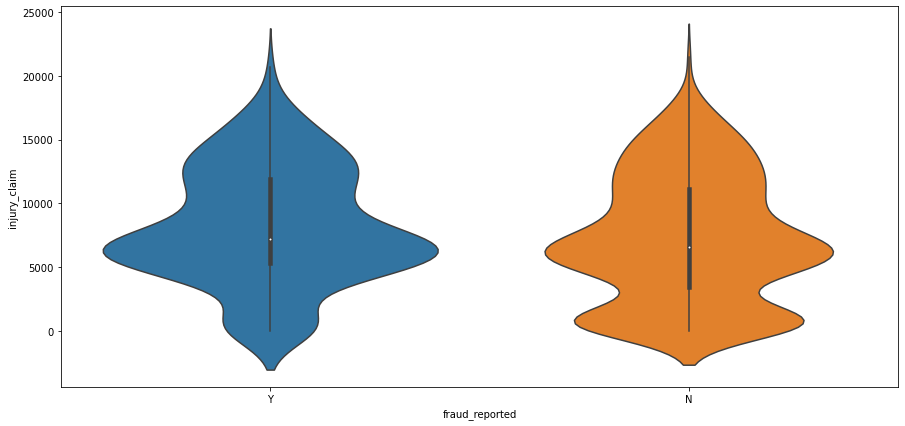

In [46]:
plt.figure(figsize=(15,7))
sns.violinplot(y='injury_claim', x='fraud_reported', data=df)

most of the cx injury claim is 100 to 15000

most fraud reported cx are between 5000 to 8000 injury claim

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

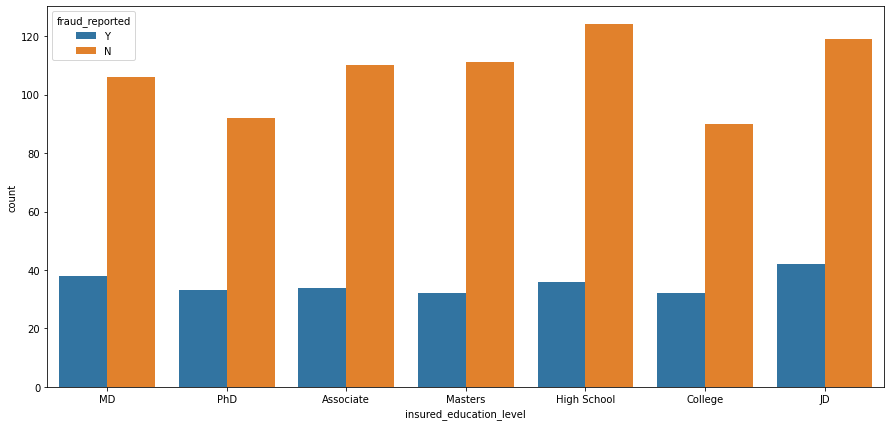

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_education_level', hue='fraud_reported', data=df)

we higher cx those are education level is high school and least cx in Phd and college

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

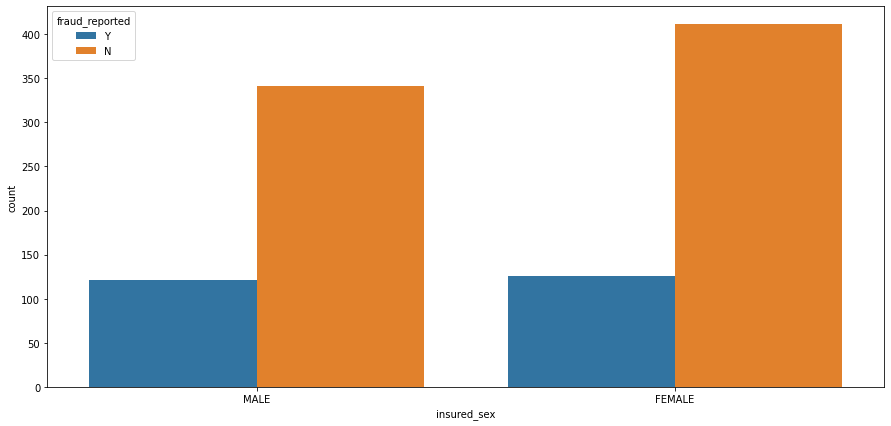

In [48]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_sex', hue='fraud_reported', data=df)

We have more cx in female than male

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

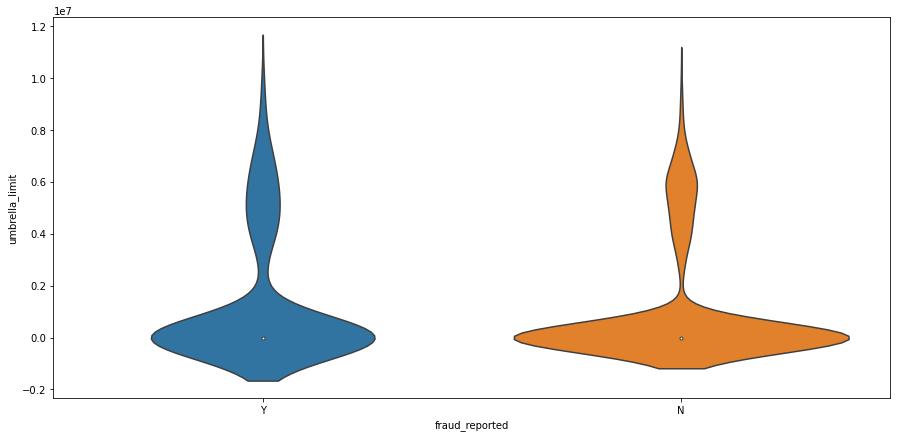

In [49]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported', y='umbrella_limit', data=df)

mose of the cx we have their unbrella limit is 0

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

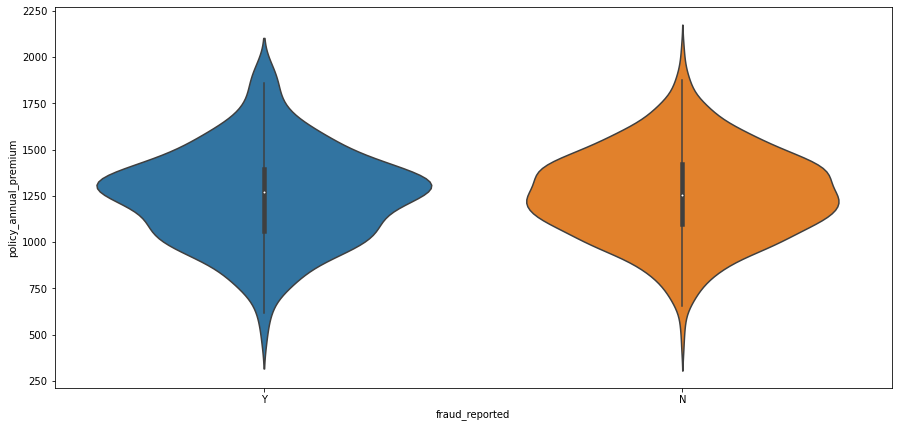

In [50]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported', y='policy_annual_premium', data=df)

most of the cx we have 1000 to  1500 of premium payers

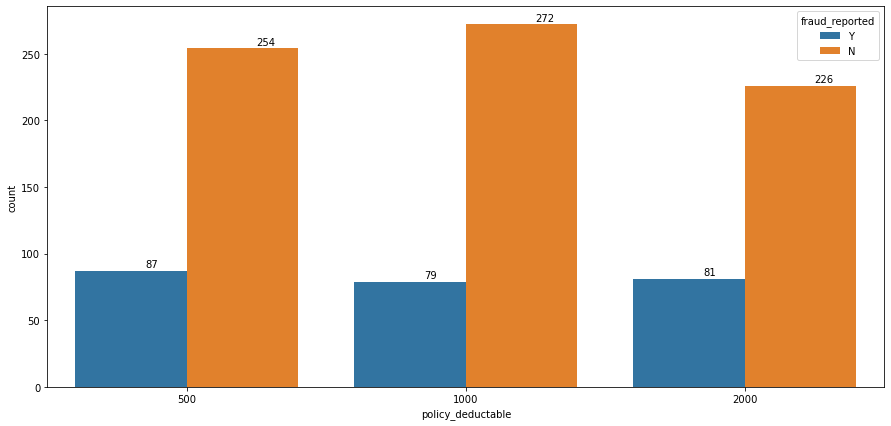

In [51]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='policy_deductable', hue='fraud_reported', data=df)
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25, p.get_height()+1), va='bottom', color='black')

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

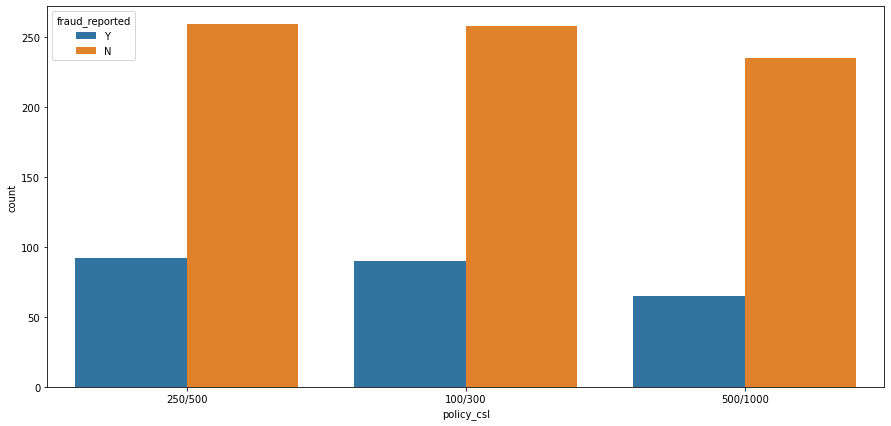

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_csl', hue='fraud_reported', data=df)

in all three csl we have same kind of similar fraud report

<AxesSubplot:xlabel='policy_state', ylabel='count'>

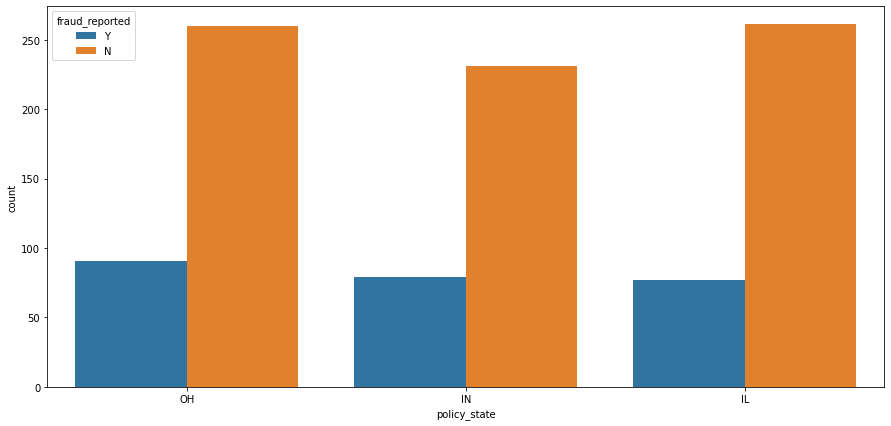

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_state', hue='fraud_reported', data=df)

we have cx from three states and fraud report almost common in all three states

<AxesSubplot:xlabel='age', ylabel='count'>

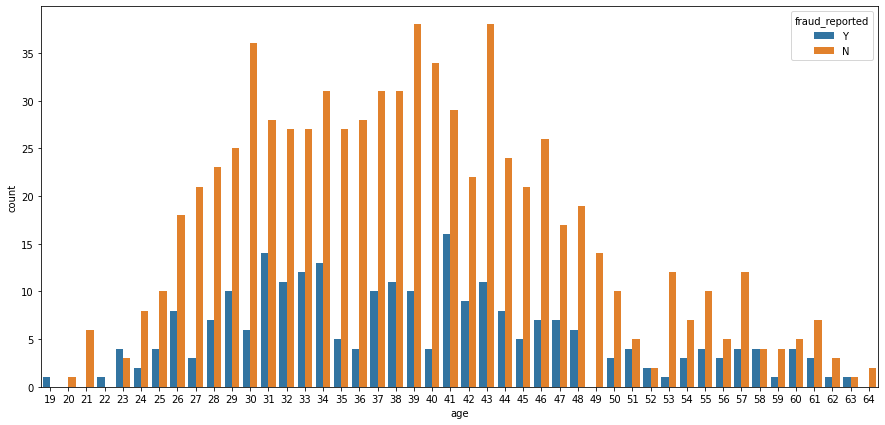

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(x='age', hue='fraud_reported', data=df)

we see most the cx are age of 26 to 50

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

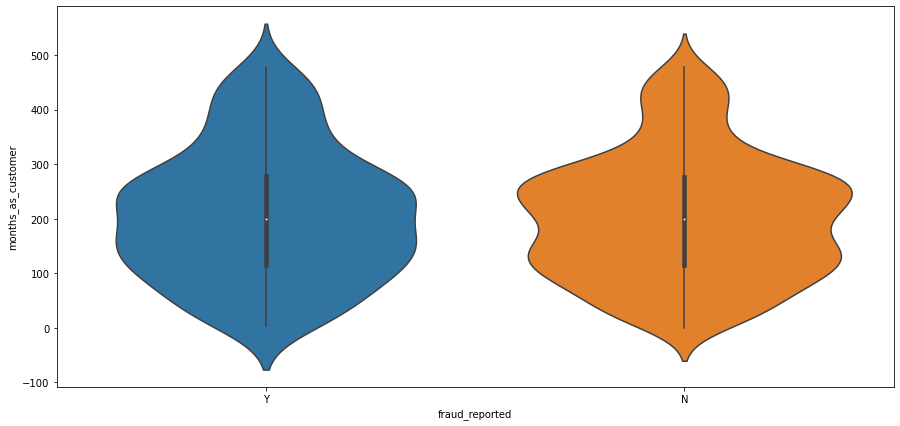

In [55]:
plt.figure(figsize=(15,7))
sns.violinplot(y='months_as_customer', x='fraud_reported', data=df)

most of the cx are 100 to 300 months old

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '2000'),
  Text(3, 0, '1990'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

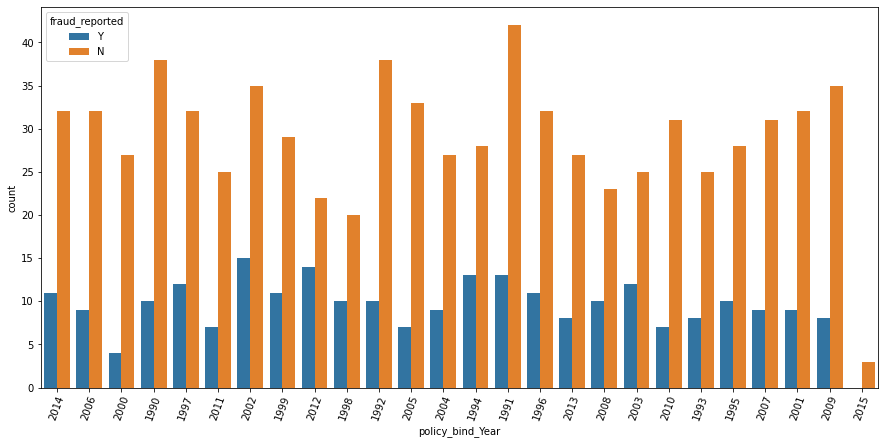

In [56]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_bind_Year', hue='fraud_reported', data=df)
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

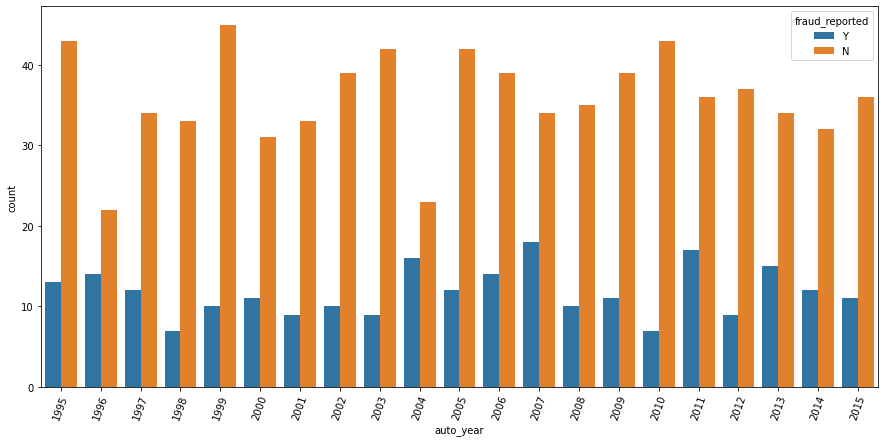

In [112]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_year', hue='fraud_reported', data=df)
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

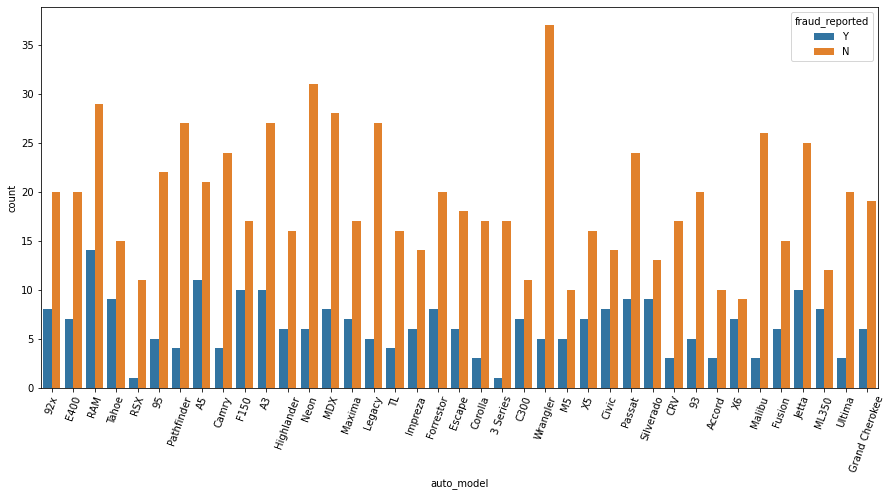

In [57]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_model', hue='fraud_reported', data=df)
plt.xticks(rotation=70)

most of the auto model we see in Wragler Ram pathfinder neon etc

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Mercedes'),
  Text(2, 0, 'Dodge'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Accura'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Audi'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Ford'),
  Text(9, 0, 'Suburu'),
  Text(10, 0, 'BMW'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Volkswagen')])

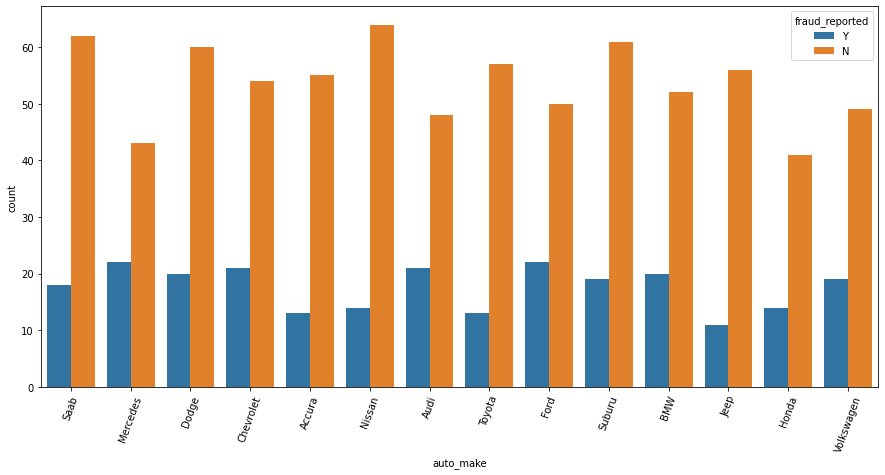

In [58]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_make', hue='fraud_reported', data=df)
plt.xticks(rotation=70)

Fraud report claim is higher is Saab, merceded, dodge, chevrolet audi ford, suburu bmw, volkswagen auto make

have done all the analysis of the important features. some features dont have much information to define

# Skewness handling

skewness and outliers can be handled in numeric columns only

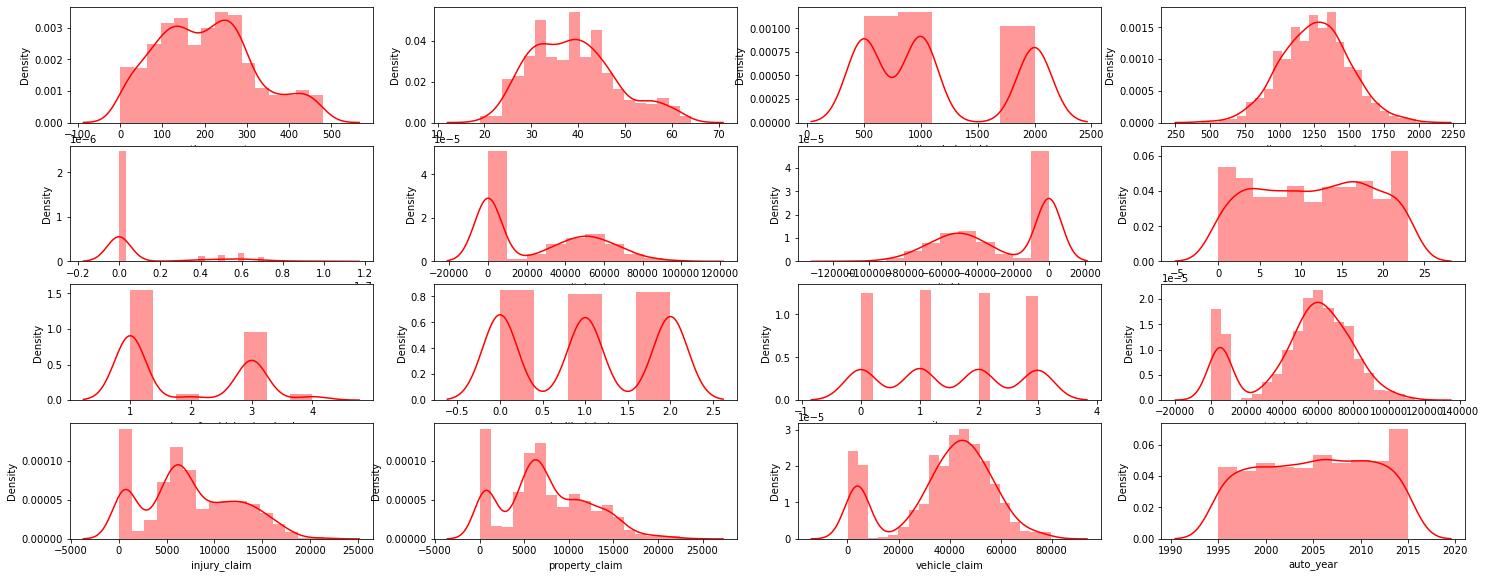

In [59]:
plt.figure(figsize=(25,20))
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]], color='r')

In [60]:
df.select_dtypes(include=['int64','float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64

skewness morethan +/- 0.5 will be treated

object and target variable columns cannot be treated

we can see that most of the columns are skewed

will only deal with numeric columns

In [61]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_claim']]=power_transform(
    df[['umbrella_limit','total_claim_amount','vehicle_claim']], method='yeo-johnson')

# Outliers Handling

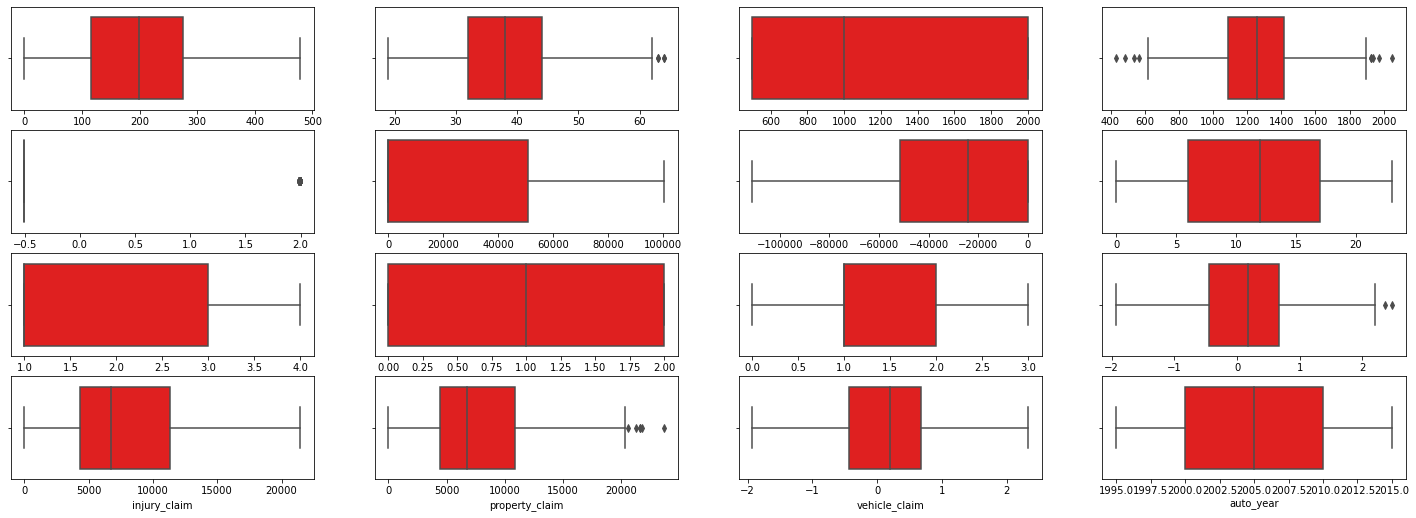

In [62]:
plt.figure(figsize=(25,20))
for o in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]], color='r')

only some columns see outliers after removing skewness

# Outliers removal

In [64]:
from scipy.stats import zscore
z=np.abs(zscore(df.select_dtypes(include=['int64','float','int32'])))
print(np.where(z>3))

(array([229, 248, 499, 762, 806], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [65]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::", df.shape)
print("after removing outliers::",df_1.shape)

with outliers:: (999, 40)
after removing outliers:: (994, 40)


In [67]:
df=df_1

# Using LabelEncoder for converting categorical to numerical    

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    object 
 3   policy_csl                   994 non-null    object 
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    object 
 8   insured_education_level      994 non-null    object 
 9   insured_occupation           994 non-null    object 
 10  insured_hobbies              994 non-null    object 
 11  insured_relationship         994 non-null    object 
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le=LabelEncoder()
categ_data=df.select_dtypes(exclude=['int64','float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    int32  
 3   policy_csl                   994 non-null    int32  
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    int32  
 8   insured_education_level      994 non-null    int32  
 9   insured_occupation           994 non-null    int32  
 10  insured_hobbies              994 non-null    int32  
 11  insured_relationship         994 non-null    int32  
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

all the columns are converted into numeric

# Splitting the data into X and Y

In [72]:
x=df.drop(['fraud_reported'], axis=1)
y=df['fraud_reported']

In [73]:
x.shape

(994, 39)

In [74]:
y.shape

(994,)

# scaling x values

In [75]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [76]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

In [77]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.426698,0.443975,0.507042,0.474849,0.424883,0.502476,0.201896,0.463783,0.494634,0.512692,0.512072,0.482093,0.249717,0.714591,0.498721,0.390677,0.529510,0.395708,0.542505,0.540744,0.495137,0.507567,0.280013,0.481891,0.496982,0.493628,0.485412,0.437963,0.345997,0.337963,0.452576,0.504179,0.508790,0.505785,0.467270,0.248994,0.480751,0.506585,0.463380
std,0.240313,0.203319,0.415523,0.402499,0.408046,0.168078,0.401223,0.498938,0.324961,0.309271,0.299356,0.336233,0.277252,0.298844,0.291555,0.360830,0.380619,0.313651,0.382973,0.359714,0.340398,0.302092,0.339745,0.400370,0.409469,0.370100,0.405201,0.227219,0.227594,0.219722,0.235036,0.310061,0.293301,0.300326,0.288265,0.261924,0.293300,0.318378,0.294742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242171,0.288889,0.000000,0.000000,0.000000,0.385783,0.000000,0.000000,0.166667,0.230769,0.263158,0.200000,0.000000,0.451122,0.254237,0.000000,0.000000,0.000000,0.250000,0.166667,0.166667,0.260870,0.000000,0.000000,0.000000,0.083333,0.000000,0.336733,0.199767,0.203347,0.349015,0.230769,0.263158,0.250000,0.233333,0.000000,0.233333,0.181818,0.200000
50%,0.417537,0.422222,0.500000,0.500000,0.333333,0.502305,0.000000,0.000000,0.500000,0.538462,0.526316,0.400000,0.000000,0.751603,0.508475,0.333333,0.666667,0.333333,0.500000,0.666667,0.500000,0.521739,0.000000,0.500000,0.500000,0.333333,0.500000,0.478748,0.315152,0.308803,0.499869,0.538462,0.526316,0.500000,0.466667,0.000000,0.483333,0.545455,0.480000
75%,0.577766,0.572222,1.000000,1.000000,1.000000,0.613049,0.000000,1.000000,0.833333,0.769231,0.789474,0.800000,0.507463,1.000000,0.745763,0.666667,1.000000,0.666667,1.000000,0.833333,0.833333,0.739130,0.666667,1.000000,1.000000,0.666667,1.000000,0.591345,0.525175,0.497707,0.612979,0.769231,0.763158,0.750000,0.700000,0.500000,0.733333,0.818182,0.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


data have been scalled

# Imbalanced Learn

Using Oversampling BorderlineSmote

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

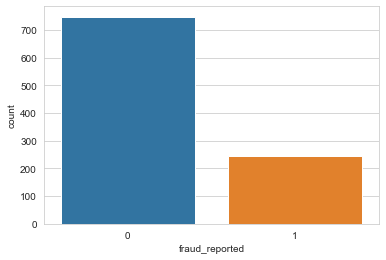

In [78]:
sns.set_style("whitegrid")
sns.countplot(x="fraud_reported", data=df)

In [80]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus=BorderlineSMOTE().fit_resample(x,y)
print('orginal Target dataset shape:', y.shape)
print('Resample Target dataset shape',y_rus.shape)

orginal Target dataset shape: (994,)
Resample Target dataset shape (1496,)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

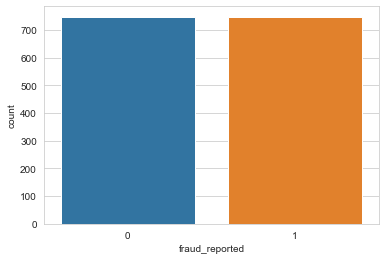

In [82]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Now we have balanced the data for model Training

# Splitting Train and Test Data

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x_rus, y_rus,test_size=.27, random_state=42)

In [84]:
x_train.shape

(1092, 39)

In [85]:
x_test.shape

(404, 39)

In [86]:
y_train.shape

(1092,)

In [87]:
y_test.shape

(404,)

# Model Building:

# Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print('cross validation score:',np.mean(logreg_score))

cross validation score: 0.7580379041248607


In [91]:
logreg.fit(x_train,y_train)
LR_Predicted=logreg.predict(x_test)

print(accuracy_score(y_test, LR_Predicted))
print(confusion_matrix(y_test, LR_Predicted))
print(classification_report(y_test, LR_Predicted))

print("Training accuracy::",logreg.score(x_train, y_train))
print("Test accuracy::",logreg.score(x_test, y_test))


0.7252475247524752
[[121  65]
 [ 46 172]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.69       186
           1       0.73      0.79      0.76       218

    accuracy                           0.73       404
   macro avg       0.73      0.72      0.72       404
weighted avg       0.73      0.73      0.72       404

Training accuracy:: 0.7774725274725275
Test accuracy:: 0.7252475247524752


# Decision Tree Classifier

In [94]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print('cross validation score for dtc:',np.mean(dtc_score))

cross validation score for dtc: 0.838978818283166


In [95]:
dtc.fit(x_train,y_train)
dtc_Predicted=dtc.predict(x_test)

print(accuracy_score(y_test, dtc_Predicted))
print(confusion_matrix(y_test, dtc_Predicted))
print(classification_report(y_test, dtc_Predicted))

print("Training accuracy::",dtc.score(x_train, y_train))
print("Test accuracy::",dtc.score(x_test, y_test))


0.8638613861386139
[[158  28]
 [ 27 191]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       186
           1       0.87      0.88      0.87       218

    accuracy                           0.86       404
   macro avg       0.86      0.86      0.86       404
weighted avg       0.86      0.86      0.86       404

Training accuracy:: 1.0
Test accuracy:: 0.8638613861386139


# KNeighbors Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print('cross validation score for knn:',np.mean(knn_score))

cross validation score for knn: 0.6651371237458195


In [98]:
knn.fit(x_train,y_train)
knn_Predicted=knn.predict(x_test)

print(accuracy_score(y_test, knn_Predicted))
print(confusion_matrix(y_test, knn_Predicted))
print(classification_report(y_test, knn_Predicted))

print("Training accuracy::",knn.score(x_train, y_train))
print("Test accuracy::",knn.score(x_test, y_test))


0.6658415841584159
[[ 59 127]
 [  8 210]]
              precision    recall  f1-score   support

           0       0.88      0.32      0.47       186
           1       0.62      0.96      0.76       218

    accuracy                           0.67       404
   macro avg       0.75      0.64      0.61       404
weighted avg       0.74      0.67      0.62       404

Training accuracy:: 0.739010989010989
Test accuracy:: 0.6658415841584159


# RandomForestClassifier

In [99]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print('cross validation score for rfc:',np.mean(rfc_score))

cross validation score for rfc: 0.8683879598662207


In [100]:
rfc.fit(x_train,y_train)
rfc_Predicted=rfc.predict(x_test)

print(accuracy_score(y_test, rfc_Predicted))
print(confusion_matrix(y_test, rfc_Predicted))
print(classification_report(y_test, rfc_Predicted))

print("Training accuracy::",rfc.score(x_train, y_train))
print("Test accuracy::",rfc.score(x_test, y_test))


0.8613861386138614
[[163  23]
 [ 33 185]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       186
           1       0.89      0.85      0.87       218

    accuracy                           0.86       404
   macro avg       0.86      0.86      0.86       404
weighted avg       0.86      0.86      0.86       404

Training accuracy:: 1.0
Test accuracy:: 0.8613861386138614


# Ensemble Techniques

# 1.ADA Boost Classifier

In [102]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=5,scoring='accuracy')
print('cross validation score for adb:',np.mean(adb_score))

cross validation score for adb: 0.8430301003344483


In [103]:
adb.fit(x_train,y_train)
adb_Predicted=adb.predict(x_test)

print(accuracy_score(y_test, adb_Predicted))
print(confusion_matrix(y_test, adb_Predicted))
print(classification_report(y_test, adb_Predicted))

print("Training accuracy::",adb.score(x_train, y_train))
print("Test accuracy::",adb.score(x_test, y_test))


0.8391089108910891
[[158  28]
 [ 37 181]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       186
           1       0.87      0.83      0.85       218

    accuracy                           0.84       404
   macro avg       0.84      0.84      0.84       404
weighted avg       0.84      0.84      0.84       404

Training accuracy:: 0.9120879120879121
Test accuracy:: 0.8391089108910891


# Bagging Classifier

In [104]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=5,scoring='accuracy')
print('cross validation score for bgc:',np.mean(bgc_score))

cross validation score for bgc: 0.866365663322185


In [105]:
bgc.fit(x_train,y_train)
bgc_Predicted=bgc.predict(x_test)

print(accuracy_score(y_test, bgc_Predicted))
print(confusion_matrix(y_test, bgc_Predicted))
print(classification_report(y_test, bgc_Predicted))

print("Training accuracy::",bgc.score(x_train, y_train))
print("Test accuracy::",bgc.score(x_test, y_test))

0.8712871287128713
[[161  25]
 [ 27 191]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       186
           1       0.88      0.88      0.88       218

    accuracy                           0.87       404
   macro avg       0.87      0.87      0.87       404
weighted avg       0.87      0.87      0.87       404

Training accuracy:: 0.9935897435897436
Test accuracy:: 0.8712871287128713


# GradientBoostingClassifier

In [106]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=5,scoring='accuracy')
print('cross validation score for grbc:',np.mean(grbc_score))

cross validation score for grbc: 0.8684013377926421


In [107]:
grbc.fit(x_train,y_train)
grbc_Predicted=grbc.predict(x_test)

print(accuracy_score(y_test, grbc_Predicted))
print(confusion_matrix(y_test, grbc_Predicted))
print(classification_report(y_test, grbc_Predicted))

print("Training accuracy::",grbc.score(x_train, y_train))
print("Test accuracy::",grbc.score(x_test, y_test))

0.8910891089108911
[[158  28]
 [ 16 202]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       186
           1       0.88      0.93      0.90       218

    accuracy                           0.89       404
   macro avg       0.89      0.89      0.89       404
weighted avg       0.89      0.89      0.89       404

Training accuracy:: 0.9752747252747253
Test accuracy:: 0.8910891089108911


GradientBoostingClassifier as Final Model

In [109]:
grbc=GradientBoostingClassifier()
param_grid={'criterion':['mse','mae'],
           'n_estimators':[100,200],
           'learning_rate':[0.1,0.5,1.0],
           'random_state':[5]}

In [110]:
grbc_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)

In [111]:
grbc_grid.fit(x_train,y_train)
grbc_pred=grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::", accuracy_score(y_test,grbc_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Accuracy after parameter tuning:: 0.8737623762376238


In [112]:
grbc_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 5}

# Model Training with best parameters

In [113]:
best_param={'criterion':['mse'],
           'n_estimators':[200],
           'learning_rate':[1.0],
           'random_state':[5]}

In [114]:
best_grbc_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [115]:
best_grbc_grid.fit(x_train,y_train)
best_grbc_pred=best_grbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::", accuracy_score(y_test,best_grbc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8737623762376238


As we noticed after Hyper parameter Tuning model accuracy score got increased

# Report of GradientBoostingClassifier

In [116]:
print("Classification Report::\n", classification_report(y_test,best_grbc_pred))

Classification Report::
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       186
           1       0.87      0.90      0.88       218

    accuracy                           0.87       404
   macro avg       0.87      0.87      0.87       404
weighted avg       0.87      0.87      0.87       404



<AxesSubplot:>

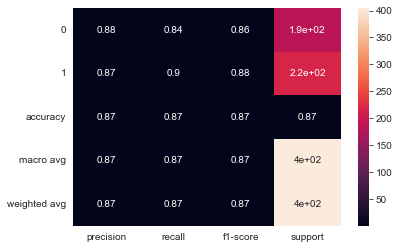

In [117]:
clsf_repo=classification_report(y_test,best_grbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [118]:
from sklearn.metrics import roc_auc_score

In [119]:
print("roc auc score::", roc_auc_score(y_test,best_grbc_pred))

roc auc score:: 0.8715842951563578


In [120]:
from sklearn.metrics import roc_curve

In [121]:
fpr1,tpr1,thresh1=roc_curve(y_test,best_grbc_pred,pos_label=1)

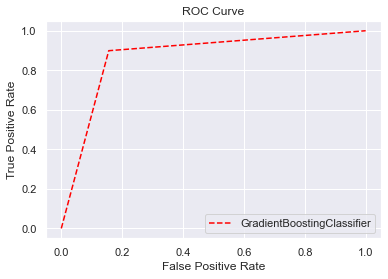

In [122]:
#plotting Roc Curve

sns.set_theme(style='darkgrid')
plt.plot(fpr1,tpr1,linestyle='--',color='red', label='GradientBoostingClassifier')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

# Saving Model

In [123]:
import joblib

In [124]:
joblib.dump(best_grbc_grid.best_estimator_,'Insurance Claims- Fraud Detection.obj')

['Insurance Claims- Fraud Detection.obj']